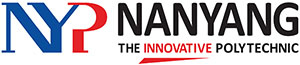



# Practical: Keras Deep Learning library

# Objectives

- Learn and understand the various functions of Keras Framework.
- Familiarize with the steps in Keras to configure and train an artificial neural network (ANN)
- Demonstrate preparation of input data set for use in training ANN.
- Learn how to define the layers of an ANN through the use of Keras _Sequential Models_.
- Demonstrate compilation of Keras models before training.
- Demonstrate the use of ```fit()``` function for training the model.
- Demonstrate the use of the ```predict()``` function to perform prediction using the trained model
- Demonstrate creation of checkpoints for training of the model

# Introduction

Keras is a popular framework for developing and training models of neural network. It supports the Python programming language and runs on top of Google's _TensorFlow_ on CPUs and GPUs. Keras allows developers to quickly define the neural network architecture, be it a simple sequential stack or more complex convolutional or recurrent networks.

This practical serves as an introduction to using Keras Some basic concepts of Keras introduced here includes 
1. preparation of dataset, 
2. definition of the network layers using the Keras sequential model, and
3. compilation and training of the definted network

We will also see how activation functions and loss functions are defined in the model training process.


# Step 1: Importing Keras

Before we use Keras, we should import the relevant libraries.

Enter the following codes to import numpy, tensorflow.keras and matplotlib packages which we will be using later.

```python
import numpy as np
import tensorflow.keras as keras
from matplotlib import pyplot as plt
```

In [ ]:
#Imports packages here



# Step 2: Importing Keras Dataset

Keras provides a few datasets for learning and experimentation purposes. Some datasets offered by Keras include:

1. CIFAR10 and CIFAR100 small image classification
2. IMDB Movie reviews sentiment classification
3. Reuters newswire topics classification
4. MNIST database of handwritten digits
5. Fashion-MNIST database of fashion articles
6. Boston housing price regression

We will be using the MNIST dataset for this practical. As you might well know, the popular MNIST dataset contains images of handwritten digits from 0 to 9. We will setup a neural network and use the data to train a model. We will then validate the model and determine the accuracy achieved.

Key in the following codes to download and load the MNIST dataset.

```python
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
```


In [ ]:
#Load the MNIST dataset here



# Step 3: Understanding the Data

Once downloaded, we should examine the dataset to better understand the data we are working with.

Print the shape of the four variables ```train_x```, ```train_y```, ```test_x```, ```test_y```.

<details>
<summary>
    <strong>Click here to see codes</strong>
</summary>
    
    
```python
print("train_x", train_x.shape)
print("train_y", train_y.shape)
print("test_x", test_x.shape)
print("test_y", test_y.shape)
```


In [ ]:
#Enter your codes here



You should be able to see that we have 60000 images of training data and each of which is of width 28 pixel and height 28 pixel. The ```training_label_all``` variable contains the corresponding labels.

There are another 10000 images that will be used for testing.

We should take a look at how each of the 28x28 image looks like. Add the following codes to plot 10 images in a grid:

```
fig, axes = plt.subplots(2, 5)
cols = 5
for j in range(2):
    for i in range(cols):
        img = train_x[j*5+i].reshape((28,28))
        axes[j, i].imshow(img, cmap="Greys")
    
plt.show()
```


In [ ]:
# Enter your codes here



You should be able the see the following image:

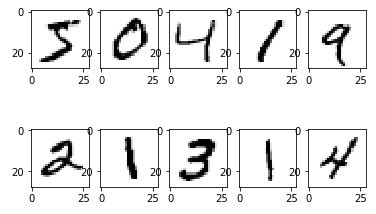

As can be seen from the figure, the 28x28 example consists of pixels of handwritting of single digits.

It is instructive to take a look at the data values as well. Print the values of the first element of the ```train_x``` and ```train_y``` variables

<details>
<summary>
    <strong>Click here to see codes</strong>
</summary>
    
    
```python
print(train_y[0])
print(train_x[0])
```

</details>

In [ ]:
#Enter your codes here




Part of the output is reproduced below. 


```
5
...
[  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241...
```

As can be seen from the output, the value of the label is ```5```, meaning that the image is of the digit 5. You should see that the image comprises bytes of pixel values ranging from 0 to 255.

Let us verify that by finding the maximum and minimum values of the all the training data.

Add and run the following codes:

```python
print(np.amin(train_x))
print(np.amax(train_x))
```

In [ ]:
#Enter your codes here



# Step 4 Preparing Data

For neural network, a general guideline is to have small values for our inputs, in our case, we will scale the values to between 0.0 and 1.0.

Add the following codes to scale the input values:

```python
train_x_scaled = train_x / 255
test_x_scaled = test_x / 255
```

In [ ]:
#Enter your codes here




Also, you should print out an item of the ```train_x_scaled``` (e.g. ```train_x_scaled[0]```) to check that the values has been scaled. You should see data as shown below:

```
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.01176471 0.07058824 0.07058824 0.07058824 0.49411765 0.53333333
  0.68627451 0.10196078 0.65098039 1.         0.96862745 0.49803922
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.11764706 0.14117647 0.36862745 0.60392157
  0.66666667 0.99215686 0.99215686 0.99215686 0.99215686 0.99215686
  0.88235294 0.6745098  0.99215686 0.94901961 0.76470588 0.25098039
 ```
 
 <details>
    <summary><strong>Click Here to See Codes</strong></summary>
    
    
```python
print(train_x_scaled[0])
```
 </details>

We will first start training with only a smaller number of samples, for example 1000 samples.

Add the following codes to reduce the sample size for training to 1000 and testing to 500, taking only the first 1000 training data and 500 testing data.

```python
train_x_1000 = train_x_scaled[:1000]
train_y_1000 = train_y[:1000]
test_x_500 = test_x_scaled[:500]
test_y_500 = test_y[:500]
```


In [ ]:
#Enter your codes here



Knowing the shape of the data is very important in setting it up for use in Keras, print the shape of the data and ensure that you have the correct shape as shown below:

<details>
    <summary><strong>Click Here to See Codes</strong></summary>
    
```python
print("train_y_1000", train_y_1000.shape)
print("train_x_1000", train_x_1000.shape)
print("test_y_500", test_y_500.shape)
print("test_x_500", test_x_500.shape)
```
</details>

```
train_y_1000 (1000,)
train_x_1000 (1000, 28, 28)
test_y_500 (500,)
test_x_500 (500, 28, 28)
```


In [ ]:
#Print the shape of the data



We will need to futher change the shape of the data in the next part.

### Flattening the data

In this practical, we will be using a simple fully connected feedforward neural network (FNN) for the 28 x 28 image. Each pixel will be considered a feature and all the pixels (features) will be used to predict one of the possible classes (0-9).As such, we will need to _flatten the data_, in other words, instead of a two dimensional 28x28 feature 2-D array, we will need to flatten the data into a single 784 feature 1-D array.

Add the following codes to flatten the training and testing input data. Print out the shape to check that it is of the correct shape.

```python
train_x_1000 = train_x_1000.reshape(1000, 784) #28*28=784
print(train_x_1000.shape)
test_x_500 = test_x_500.reshape(500, 784)
print(test_x_500.shape)
```

In [ ]:
#Enter your codes here



You should see that the shape of the training and testing input data are now (1000, 784) and (500, 784) respectively. That is, 1000 samples with 784 features and 500 samples with 784 features respectively.

# Step 5 Building the Model

One of the simplest network for Keras is to use ```Sequential``` model. It is the fully-connected neural network that we typically see in ANN. We will build the model by adding layers of nodes (neurons) in a sequential manner.

A neural network contains 

1. an input layer that supplies the input data
2. an output layer that provides the predicted value or values
3. one or more hidden layers

We will now see how to build a simple Keras ```Sequential``` model.

Key in the following codes to set up a neural network with Keras:

```python
#Create a Sequential Model
model = keras.Sequential()
# Add a Dense hidden layer to it. A Dense layer will be a fully-connected layer
model.add(keras.layers.Dense(128, input_shape=(784,), activation='relu')) #128 = 128 outputs
# Add another Dense layer to serve as the output layer
model.add(keras.layers.Dense(10, activation='softmax')) #Output 10 units
```

In the above codes, we first added a ```Dense``` layer as follows:

```python
keras.layers.Dense(128, input_shape=(784,), activation='relu')
```

The number 128 here means that the layer has 128 outputs, indirectly means that we have 128 neuron units in the layer. 

The ```input_shape``` argument is the only place that we specify the shape of the training data we will be using. Inputs to the  subsequent layers are inferred automatically. By specifying (784,) as the ```input_shape```, the layer will be expecting 784 input features. We specify (784,) instead of just 784 because the function expects a tuple as the argument. Note that there is __no__ need to specify how many examples in our input data.

For the hidden layer, the activation is specified as RELU. This is a very popular activation function to be used for hidden layers.

After adding the hidden layer, we add another ```Dense``` layer as the _output_ layer:

```python
model.add(keras.layers.Dense(10, activation='softmax')) #Output 10 units
```

The ```Dense``` layer has two arguments, the number of expected outputs and the activation function. This argument should have the value 10 since there are 10 possible output classes.

The output layer's activation function is set as "softmax". The softmax function outputs a vector that represents the probability distributions of the potential outcomes, as such, it is typically used on the output layer for a __multi-class classifier__. This fits our purpose nicely.


In [ ]:
#Enter your model construction codes here



Before we continue further, we should take a closer look at the model we have just created. We can use the ```model.summary()``` function to print some information about our model, this is useful especially in cases where there are errors in the model specification.

Add the following codes to print out a summary of our ANN model.

```python
print(model.summary())
```

In [ ]:
#Enter your codes to print the model summary



You should see an output as shown below:

```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
=================================================================
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
```

The most important values to take note of are in the 'Output Shape' column. From the printout, we can see that the first hidden layer will output 128 different values and the values are connected to the second layer which is the output layer.  The output layer has 10 outputs according to our specification.

The "Param #" column indicates the number of parameters in a particular layer which in turn indicates the number of weights.  We can see that there are 100480 parameters (or weights) for the first layer because there are 784 inputs into the layer and there are 128 neurons, this gives us 784 x 128 = 100352. Furthermore, we have a bias for each neuron and this gives us 100352 + 128 = 100480.

Similarly, the output layer has 128 (inputs) x 10 (outputs) + 10 (bias) = 1290.

These numbers will be useful if you need to have a good overall picture of the neural network architecture that you are constructing.

The number of parameters is large compared to other machine learning algorithms. We are dealing with more than 10 thousand parameters. The large number of parameters means that the model has large capacity to deal with non-linear problems we generally sees in real-life.


# Step 6 Compiling Our Model

Once we are certain that the model is setup correctly, we can compile the model. Enter the following codes to compile our ANN model:

```python
#Compile the model, since it is multi-class, we will choose the sparse_categorical_crossentropy
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
```

When compiling a model, we indicate the optimzer and the loss function. In our case, we use the Adam optimization algorithm. The Adam optimization algorithm was presented in 2015 in the ICRL conference. It is similar to the familiar stochastic gradient descent algorithm. It has gain wide popularity and is known to be better suited for data in the computer vision and natural language processing domain.

We have also chosen the ```sparse_categorical_crossentropy``` as our loss function. This is chosen since our output is multi-class. The "sparse_categorical_crossentropy" loss function is a variant of the categorical cross-entropy loss function. It is more efficient during computation but only for outputs that are mutually exclusive.


In [ ]:
# Compile the model


## Creating Checkpoint
Before we train our model, let us first create a checkpoint, this can be done by capturing the weights.

There are 2 ways to capture the weights

1. Using ```get_weights()```. This will capture the weights of the neural network of a particular layer.
2. Using ```save_weights()```. This will capture the weights of all layers.

For convenience, we will use the second method.

Add the following codes to create a checkpoint by saving all the weights of the model.

```python
model.save_weights("initial_weights.chk")
```

The above codes will save all the weights of our model into a file named ```initial_weights.chk```.

In [ ]:
# Enter your codes here to save the weights



The model is currently untrained and the set of weights were initialized randomly. we can expect the performance of the neural network to be poor.  Let us verify that.

Enter the following codes to print out the loss and accuracy of the untrained model.

```python
test_loss, test_acc = model.evaluate(test_x_500, test_y_500)
print("loss:", test_loss)
print("accuracy", test_acc)
```

In [ ]:
#Print out the codes to evaluate the model here




In our case, we have the following result:

```
16/16 [==============================] - 0s 1ms/step - loss: 2.4581 - accuracy: 0.0700
loss: 2.4581198692321777
accuracy 0.07000000029802322
```

Your results may vary as the weights are initialized randomly. The accuracy of the untrained model is only 7%.


# Step 8 Training Our Model

Let us now use the ```fit``` function to train our model. Use the following codes to train the model we have defined:

```python
model.fit(train_x_1000, train_y_1000, epochs=5, validation_data=(test_x_500,  test_y_500))
```

In the ```fit()``` function, we specify the data used for training (```train_x_1000```, ```train_y_1000```) as well as the validation data (```test_x_500```,  ```test_y_500```). The validation data allows the computation of loss and model metrics. We also specify the epochs to be 5. That is, the system will train the network iterating through all the examples 5 times.

In [ ]:
#Train the model here



After you run the above ```fit()``` function, you should see similar outputs as shown below:

```
Train on 1000 samples, validate on 500 samples
Epoch 1/5
1000/1000 [==============================] - 1s 849us/sample - loss: 1.5301 - acc: 0.6080 - val_loss: 1.0461 - val_acc: 0.7280
Epoch 2/5
1000/1000 [==============================] - 0s 94us/sample - loss: 0.6450 - acc: 0.8410 - val_loss: 0.6594 - val_acc: 0.8240
Epoch 3/5
1000/1000 [==============================] - 0s 95us/sample - loss: 0.4215 - acc: 0.8830 - val_loss: 0.5554 - val_acc: 0.8360
Epoch 4/5
1000/1000 [==============================] - 0s 94us/sample - loss: 0.3192 - acc: 0.9150 - val_loss: 0.4867 - val_acc: 0.8480
Epoch 5/5
1000/1000 [==============================] - 0s 94us/sample - loss: 0.2559 - acc: 0.9410 - val_loss: 0.4487 - val_acc: 0.8680
```

From the printout, we can see that the loss continues to decrease from 1.5301 to 0.2559 after 5 epochs. The loss based on the supplied validation dataset (val_loss) also decreases from 1.0461 to 0.4487. Similarly, the accuracy values increase from 60.8% to 94.10% for the training data and from 72.8% to 86.8% for the validation data.

Note that we can also test the model using the ```evaluate()``` function, this is useful when we have completed the training and wants to evaluate the model with another new set of data.

Run the following codes to evaluate the model again:

```python
test_loss, test_acc = model.evaluate(test_x_500, test_y_500)
print("loss:", test_loss)
print("accuracy", test_acc)
```


In [ ]:
#Evaluate the model using the evaluation function



You should be able to see similar results as shown below:

```
500/500 [==============================] - 0s 62us/sample - loss: 0.4487 - acc: 0.8680
```

The loss and accuracy are exactly the same as that from the 5th epoch during the training phase.




# Step 7 Prediction

We can now use the model to perform predictions. To do that, we simply call the ```predict()``` function of the model.

Enter and execute the following codes to perform prediction using our trained model:

```python
predictions = model.predict(test_x_500)

for i in range(len(test_x_500)):
    print("Test Label: ", test_y_500[i])
    print(predictions[i])#List of confidence for each class
    print("Prediction made by model: ", np.argmax(predictions[i])) #Choose the one with the highest confidence
    print("\n")
```

In the above code, We pass in an array of test data to the ```predict()``` function for it to make predictions. The model will perform perdiction on each of the test data and outputs confidence levels for each of the 10 classes. We can choose the one with the highest confidence level as our prediction.

Execute the above codes and examine the output


In [ ]:
#Enter your codes use the model for prediction



You should see a list of outputs as follows:

```
...
Test Label:  0
[7.5991076e-01 8.7412284e-04 8.0805495e-02 6.9219302e-03 4.5375670e-03
 1.5626855e-02 3.6318250e-02 4.1597657e-04 9.0346731e-02 4.2422591e-03]
Prediction made by model:  0


Test Label:  5
[2.74492125e-03 9.17030149e-04 9.09658993e-05 1.09634304e-03
 3.24158440e-03 4.73838076e-02 3.43880907e-04 1.01628765e-01
 6.75191637e-03 8.35800827e-01]
Prediction made by model:  9

...
```

Note that most of the predictions are correct but you should be able to see that there are some wrong predictions as well. An example is shown above where the test data is 5 but it was predicted as 9 (5 kind of look like 9 if not written properly).

It is instructive to look at the handwritten digit and see the prediction result.

Add the following codes to plot the handwritten images and their predicted values

```python
rows = 5
cols = 4

plt.figure(figsize=(15, 16))
for i in range(rows*cols):
    plt.subplot(rows, cols, i+1)
    
    plt.grid(False)#Remove grid
    plt.xticks([]) #Remove the tick marks
    plt.yticks([]) #Remove the tick marks
  
    plt.imshow(test_x[i], cmap=plt.cm.binary)
  
    predicted_label = np.argmax(predictions[i])
    
    plt.xlabel("Predicted:{} (Truth:{}) Confidence {:2.0f}%".format(predicted_label, test_y[i], 100*np.max(predictions[i])))
plt.show()

```


In [ ]:
#Enter your codes to visualize prediction results here


## Restoring Weights

Let us now try to reset our model to the checkpoint which is the untrained state. We will overwrite the weights in the neural network by the weights we save to the file previously. 

Add the following codes to load the weights and revert the neural network to the untrained state.

```python
model.load_weights("initial_weights.chk")
```



In [ ]:
#Enter your codes to load the weights from our checkpoint



To test that the neural network has been successfully loaded, execute the codes to evaluate the network again. You should see that the accuracy is now the same as when it was untrained.

In [ ]:
#Evaluate your model here



## Notes

As mentioned previously, instead of saving the weights to a file, you can use the ```get_weights()``` function to get the weights layer-by-layer.

We have 2 layers in our model, so use the following codes to retrieves the weights for the layers
```
layer1_weights = model.layer[0].get_weights()
layer2_weights = model.layer[1].get_weights()
```

Use the following codes to restore the weights to the layers
```
model.get_layer(index=0).set_weights(layer1_weights)
model.get_layer(index=1).set_weights(layer2_weights)
```






## Exercises

Keeping other parameters/configuration constant, modify the following and examine its effect on the loss and accuracy of the model.

1. Change the optimizer to _stochastic gradient descent (sgd)_ and _RMSprop_. More info at https://keras.io/optimizers/. Which optimizer provides better results?
2. Change the epoch to 15 instead of 5. What do you notice about the accuracy on training data (acc) vs testing data (val_acc)?
3. Use all the provided samples instead of subset of the samples.

__Note:__ You might find the functions ```model.save_weights()``` and ```model.load_weights()``` helpful in resetting the weights for experiementation and fair comparison.

In [ ]:
#Enter your codes here


# Conclusion

In this practical, we looked at the basic steps necessary to setup an artificial neural network (ANN) using Keras. We use the MNIST dataset comprising of handwritten data sample of digits (0-9) and trained the ANN to recognize the handwritten digits.

We demonstrated how to

1. Define the layers for the Keras ANN.
2. Compile the model.
3. Train the model.
4. Use the trained model for prediction.
5. View the loss and accuracy of the model.
6. Visualize the predictions.
7. Save and load the weights of the neural network to create and restore to a checkpoint.